# BIOS512 Assignment #3

Import the 📈Tidyverse into your `R` session

In [1]:
library('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In this assignment we'll be using data from the [TidyTuesday Project](https://github.com/rfordatascience/tidytuesday). Specifically, we'll investigate vaccination rates at US schools. A `CSV` file of the data is located at:  

[https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv)

Get the "raw" data URL and import it into your `R` session using `read_csv`. Remember to capture the data under a variable name of your choosing!

In [2]:
df_measles = read_csv(
    'https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/master/data/2020/2020-02-25/measles.csv',
    col_types = cols()
)

In [3]:
df_measles|> head()

index,state,year,name,type,city,county,district,enroll,mmr,overall,xrel,xmed,xper,lat,lng
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Arizona,2018-19,A J Mitchell Elementary,Public,Nogales,Santa Cruz,NA,51,100,-1,NA,NA,NA,31.34782,-110.9380
2,Arizona,2018-19,Academy Del Sol,Charter,Tucson,Pima,NA,22,100,-1,NA,NA,NA,32.22192,-110.8961
3,Arizona,2018-19,Academy Del Sol - Hope,Charter,Tucson,Pima,NA,85,100,-1,NA,NA,NA,32.13049,-111.1170
4,Arizona,2018-19,Academy Of Mathematics And Science South,Charter,Phoenix,Maricopa,NA,60,100,-1,NA,NA,NA,33.48545,-112.1306
5,Arizona,2018-19,Acclaim Academy,Charter,Phoenix,Maricopa,NA,43,100,-1,NA,2.33,2.33,33.49562,-112.2247
6,Arizona,2018-19,Alfred F Garcia,Public,Phoenix,Maricopa,NA,36,100,-1,NA,NA,NA,33.43532,-112.1168


The `mmr` column has holds 🤒 measles, mumps, rubella 🤒 vaccination rates for students in each respective school. **If the `mmr` value is not available for a school the `mmr` value is set to -1 in this data set.** 

The target `mmr` vaccination rate as [recommended by the CDC](https://www.cdc.gov/mmwr/preview/mmwrhtml/mm5632a3.htm) for schools is 95%. 

**Calculate the fraction of schools per state that have vaccination rates greater than the CDC 95%. Capture the output as a table called `df_vacc_rates`.**

You'll need to do use `filter`, `group_by`, and `summarize`. 

I.e.
1. Filter out schools that don't report `mmr` vaccination rate (keep schools where `mmr >= 0`).
1. Group the data by `state`.
1. Summarize fracion of vaccination rates above 95%.

💡Remember `n()` stands for the number or records in a group. Also, `sum(mmr >= 95, na.rm=TRUE)` will count the number of values above or equal to 95.💡

In [4]:
# create the df_vacc_rates here
df_vacc_rates = df_measles |>
    filter(mmr >= 0) |>
    group_by(state) |>
    summarize(frac = sum(mmr >= 95, na.rm=TRUE)/ n())

In [5]:
df_vacc_rates |> head()

state,frac
<chr>,<dbl>
Arizona,0.506404782
Arkansas,0.003527337
California,0.888506151
Colorado,0.623092236
Connecticut,0.811544992
Illinois,0.896825397


Which state (of those that report `mmr`) has the smallest fraction of schools above the CDC target vaccination rate of 95%?  

In [6]:
df_vacc_rates |>
   top_n(n = 1, wt = -frac)

state,frac
<chr>,<dbl>
Arkansas,0.003527337


**Answer:**
*Arkansas has the smallest fraction of schools above the CDC target vaccination rate of 95%*

**Make a ECDF plot of the school vaccination rates in North Carolina.** Use the `overall` column which reports the "overall" vaccination rate at each school.

❗️Remember, you can calculate the `y` value for ECDF charts using `mutate`, and `cume_dist`.

In [7]:
nc_measles = df_measles |>
    filter(state == 'North Carolina') |>
    mutate(overall_ecdf = cume_dist(overall))

In [8]:
nc_measles |> head()

index,state,year,name,type,city,county,district,enroll,mmr,overall,xrel,xmed,xper,lat,lng,overall_ecdf
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,North Carolina,2018-19,A T Allen Elementary,NA,NA,Cabarrus,NA,132,-1,100,NA,NA,NA,35.36238,-80.51297,1
2,North Carolina,2018-19,A.C.E. Academy,NA,NA,Cabarrus,NA,44,-1,100,NA,NA,NA,35.30806,-80.67281,1
3,North Carolina,2018-19,ABC of NC Child Develop. Ctr,NA,NA,Davidson,NA,1,-1,100,NA,NA,NA,35.99481,-80.27403,1
4,North Carolina,2018-19,Agape Christian,NA,NA,Ashe,NA,3,-1,100,NA,NA,NA,36.42064,-81.48704,1
5,North Carolina,2018-19,Agape International Christian Academy,NA,NA,Franklin,NA,1,-1,100,NA,NA,NA,36.03484,-78.49820,1
6,North Carolina,2018-19,Ahoskie Christian,NA,NA,Hertford,NA,32,-1,100,NA,NA,NA,36.27857,-76.97674,1


In [9]:
install.packages("ggrepel")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [10]:
library(ggrepel)

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


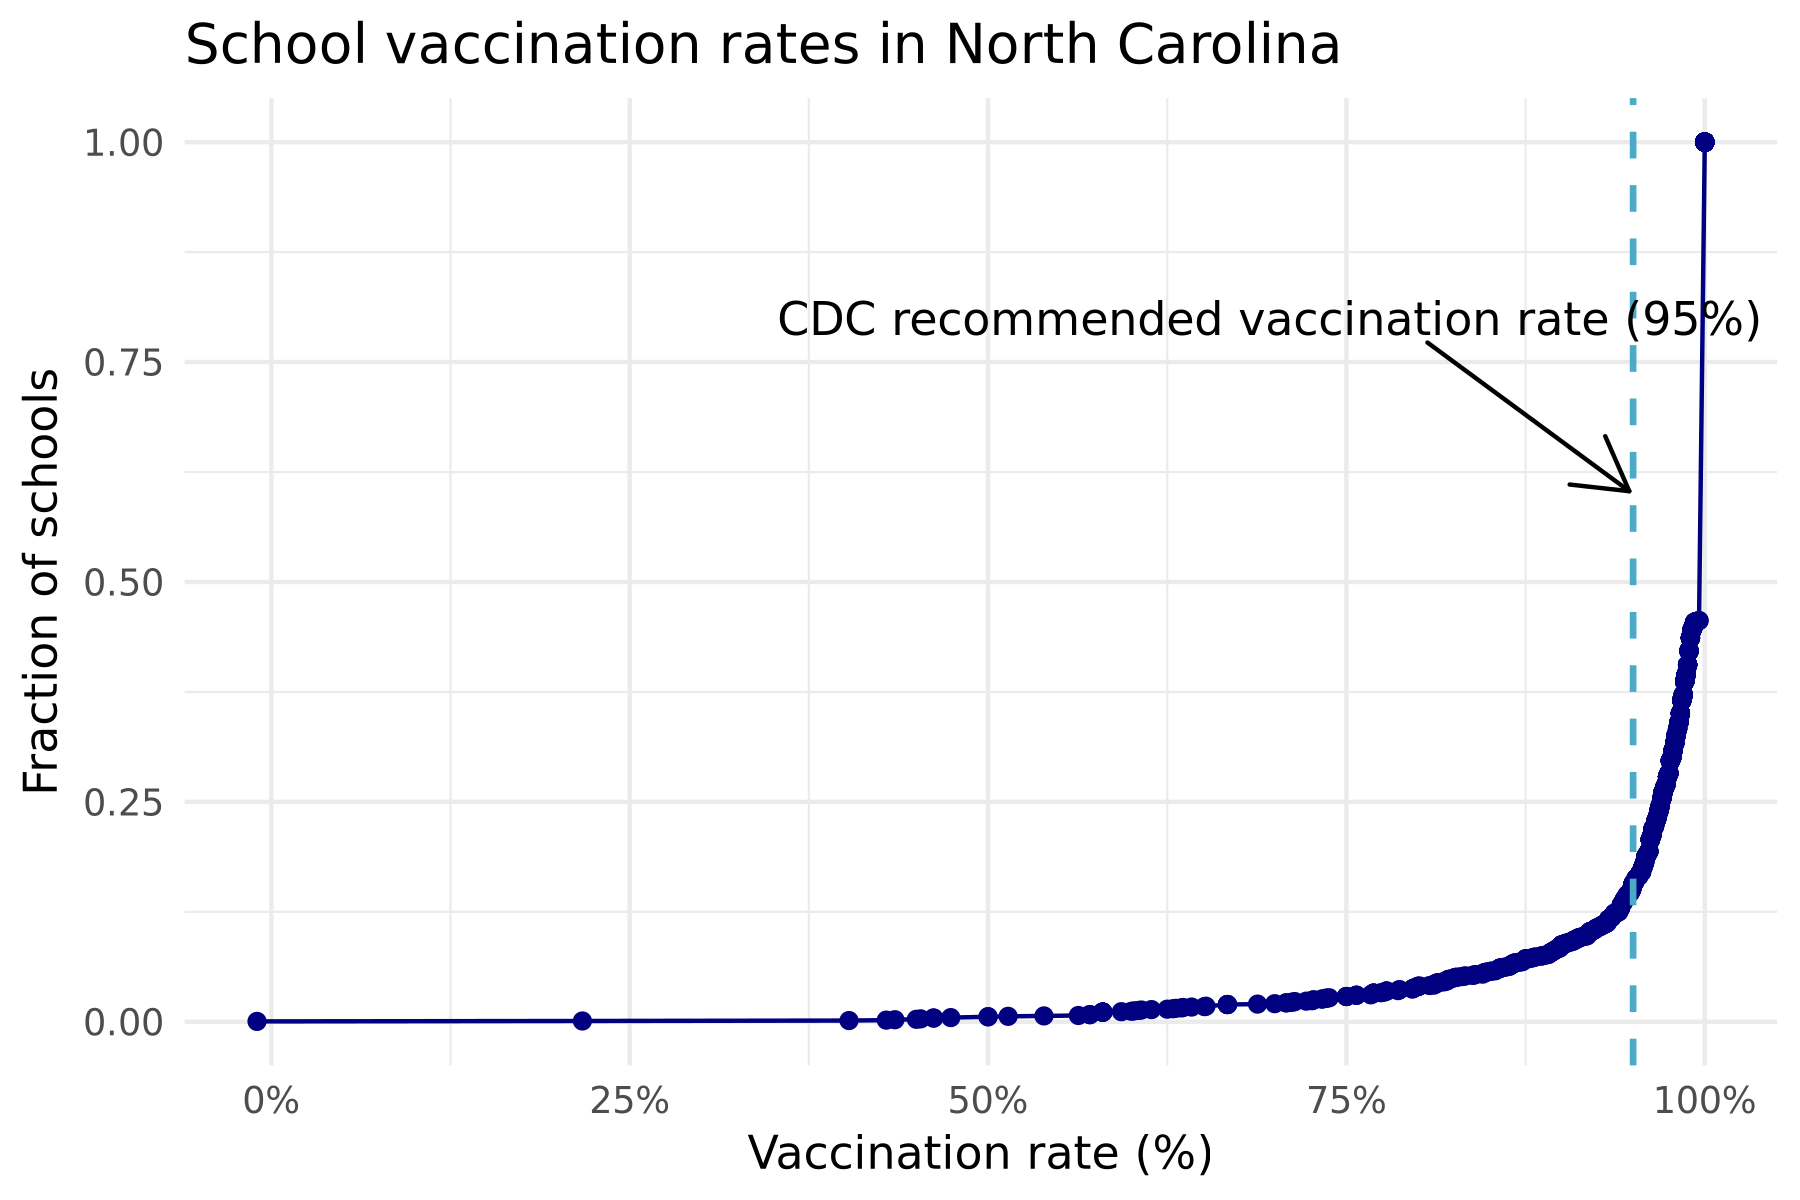

In [11]:
options(repr.plot.res = 300, repr.plot.width = 6, repr.plot.height = 4)

annotation_data = data.frame(x = 95, y = 0.6, label = "CDC recommended vaccination rate (95%)")


ggplot(nc_measles, aes(x = overall, y = overall_ecdf)) + 
     geom_line(color = '#000080') + #, linewidth = 2
    geom_point(color = '#000080', fill = NA) + 
    geom_vline(aes(xintercept = 95),   # Ignore NA values for mean
               color="#4BAAC8", linetype="dashed", size = 0.75) +
        geom_text_repel(data = annotation_data, aes(x = x, y = y, label = label), 
                  arrow = arrow(length = unit(0.2, "inches")),
                  nudge_y = 0.2,  # Adjust vertical position as needed
                  show.legend = FALSE) +
    scale_x_continuous(labels = scales::percent_format(scale = 1)) +  # Adjust for whole numbers
    labs(
    title = "School vaccination rates in North Carolina",
    x = "Vaccination rate (%)",  # Change x-axis title
    y = "Fraction of schools"        # Change y-axis title
  ) + 
    theme_minimal()

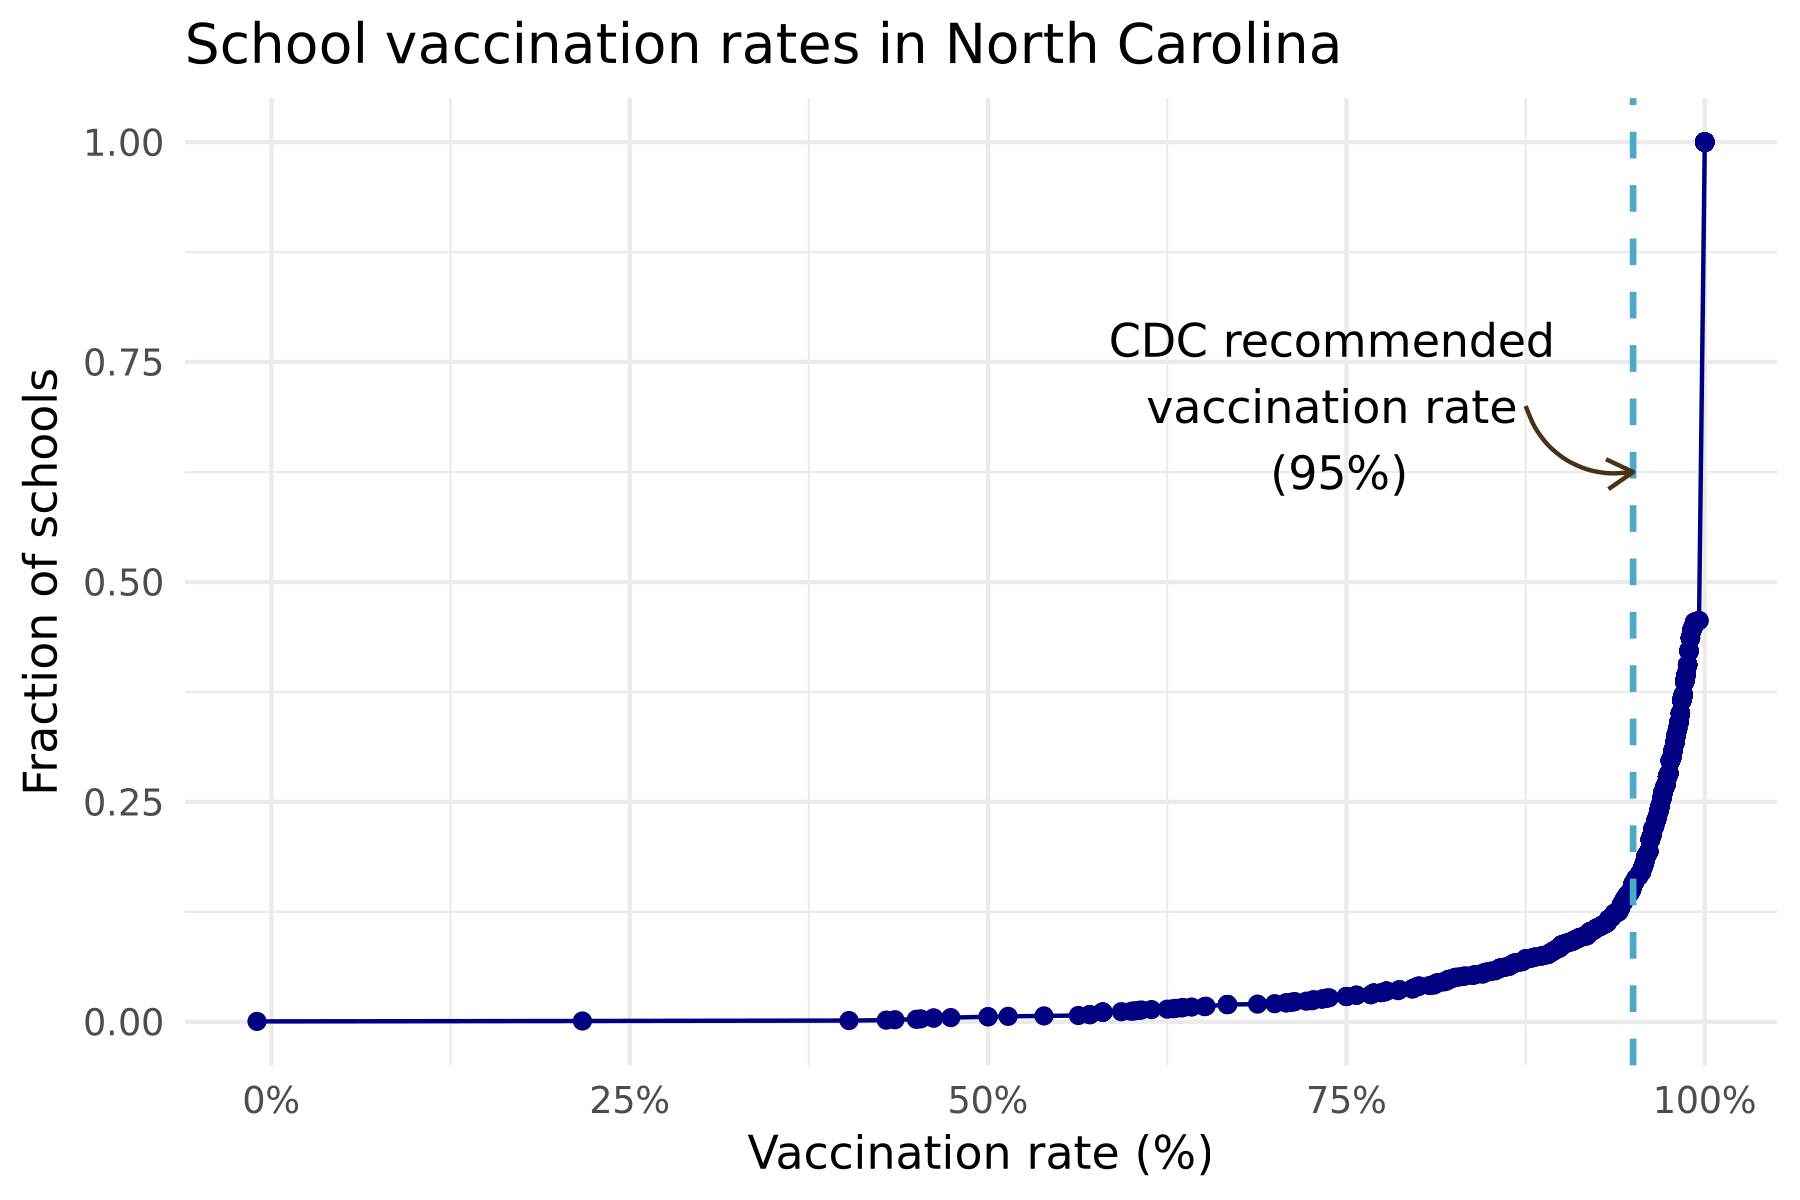

In [12]:
options(repr.plot.res = 300, repr.plot.width = 6, repr.plot.height = 4)

annotation_data = data.frame(x = 74.5, y = 0.5, label = "CDC recommended \nvaccination rate \n(95%)")


ggplot(nc_measles, aes(x = overall, y = overall_ecdf)) + 
     geom_line(color = '#000080') + #, linewidth = 2
    geom_point(color = '#000080', fill = NA) + 
    geom_vline(aes(xintercept = 95),   # Ignore NA values for mean
               color="#4BAAC8", linetype="dashed", size = 0.75) + 
    geom_curve(data = data.frame(x = 87.5, y = 0.7, xend = 95, yend = 0.625),
             aes(x = x, y = y, xend = xend, yend = yend),
             curvature = 0.4, # Adjust curvature as needed
             arrow = arrow(length = unit(0.1, "inches")),
             color = "#473417") +  # Curved arrow
  # Add text with geom_text_repel
  geom_text_repel(data = annotation_data, aes(x = x, y = y, label = label),
                  nudge_y = 0.2,  # Adjust vertical position if needed
                  show.legend = FALSE,  # No legend
                  segment.color = NA) +  # Remove the line segment
    scale_x_continuous(labels = scales::percent_format(scale = 1)) +  # Adjust for whole numbers
    labs(
    title = "School vaccination rates in North Carolina",
    x = "Vaccination rate (%)",  # Change x-axis title
    y = "Fraction of schools"        # Change y-axis title
  ) + 
    theme_minimal()

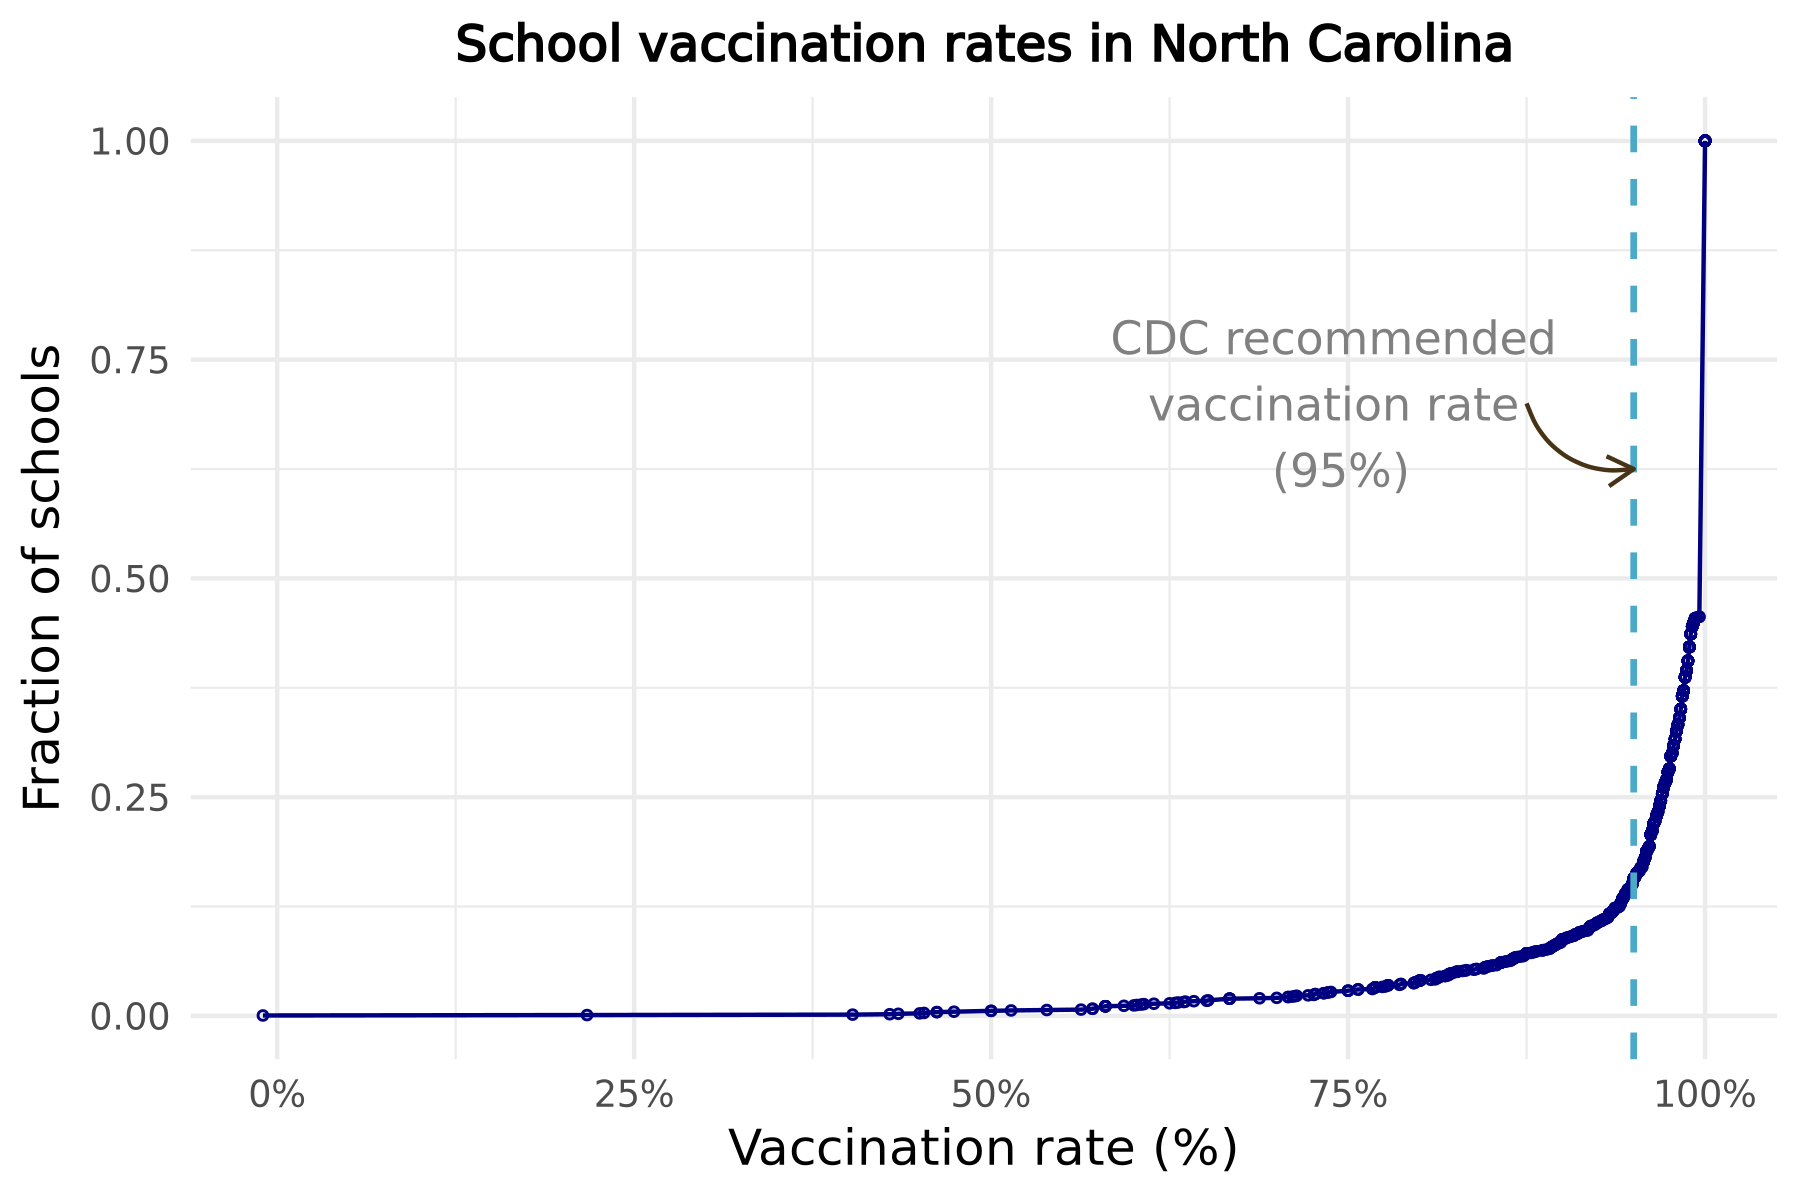

In [13]:

options(repr.plot.res = 300, repr.plot.width = 6, repr.plot.height = 4)

annotation_data = data.frame(x = 74.5, y = 0.5, label = "CDC recommended \nvaccination rate \n(95%)")


ggplot(nc_measles, aes(x = overall, y = overall_ecdf)) + 
     geom_line(color = '#000080') + #, linewidth = 2
    geom_point(shape = 1, size = 0.75, color = '#000080', fill = NA) + 
    geom_vline(aes(xintercept = 95),   # Ignore NA values for mean
               color="#4BAAC8", linetype="dashed", size = 0.75) + 
    geom_curve(data = data.frame(x = 87.5, y = 0.7, xend = 95, yend = 0.625),
             aes(x = x, y = y, xend = xend, yend = yend),
             curvature = 0.4, # Adjust curvature as needed
             arrow = arrow(length = unit(0.1, "inches")),
             color = "#473417") +  # Curved arrow
  # Add text with geom_text_repel
  geom_text_repel(data = annotation_data, aes(x = x, y = y, label = label),
                  nudge_y = 0.2,  # Adjust vertical position if needed
                  show.legend = FALSE,  # No legend
                  segment.color = NA,   # Remove the line segment      
                  color = '#808080',
                  family = 'Arial') +  # Set font family for the annotation text
  # Customize axis titles and text                
    scale_x_continuous(labels = scales::percent_format(scale = 1)) +  # Adjust for whole numbers
    labs(y = "Fraction of schools", x = "Vaccination rate (%)") +
    theme_minimal() +
    theme(
        axis.title.x = element_text(size = 12, family = "Arial"),
        axis.title.y = element_text(size = 12, family = "Arial"),
        plot.title = element_text(size = 12, face = "bold", family = "Arial", color = "black", hjust = 0.5)  # Customize plot title
      ) +
      ggtitle("School vaccination rates in North Carolina") # Add plot title

(My solution is below if you want to peek 👀. Uncomment the code, change the cell to `markdown`, and exectute it. I used `geom_text_repel` from [ggrepel](https://cran.r-project.org/web/packages/ggrepel/vignettes/ggrepel.html) fo the annotation.)

![](https://github.com/chuckpr/BIOS512/blob/main/assignments/2023/measles-chart.png?raw=true)

Is the median vaccination rate for NC schools above the CDC recommended target?

In [14]:
nc_measles |>
    summarize(median_vac = median(overall))

median_vac
<dbl>
100


**Answer**

*The median vaccination rate in NC schools is 100% so it is above the CDC recommended target.*